In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
df = pd.read_csv('/content/advertising.csv')

In [16]:
summary = df.describe(include='all')
print("Summary \n", summary)


var = df.var()
std = df.std()
range = df.max()-df.min()

print("\n Range: \n", range)
print("\n Variance: \n", var)
print("\n Standard Deviation: \n", std)

Summary 
                TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000

 Range: 
 TV           295.7
Radio         49.6
Newspaper    113.7
Sales         25.4
dtype: float64

 Variance: 
 TV           7370.949893
Radio         220.427743
Newspaper     474.308326
Sales          27.919517
dtype: float64

 Standard Deviation: 
 TV           85.854236
Radio        14.846809
Newspaper    21.778621
Sales         5.283892
dtype: float64


In [15]:
percentile = df.quantile([0.25,.5,0.75])
print("Percentile: \n", percentile)

Percentile: 
            TV   Radio  Newspaper  Sales
0.25   74.375   9.975      12.75  11.00
0.50  149.750  22.900      25.75  16.00
0.75  218.825  36.525      45.10  19.05


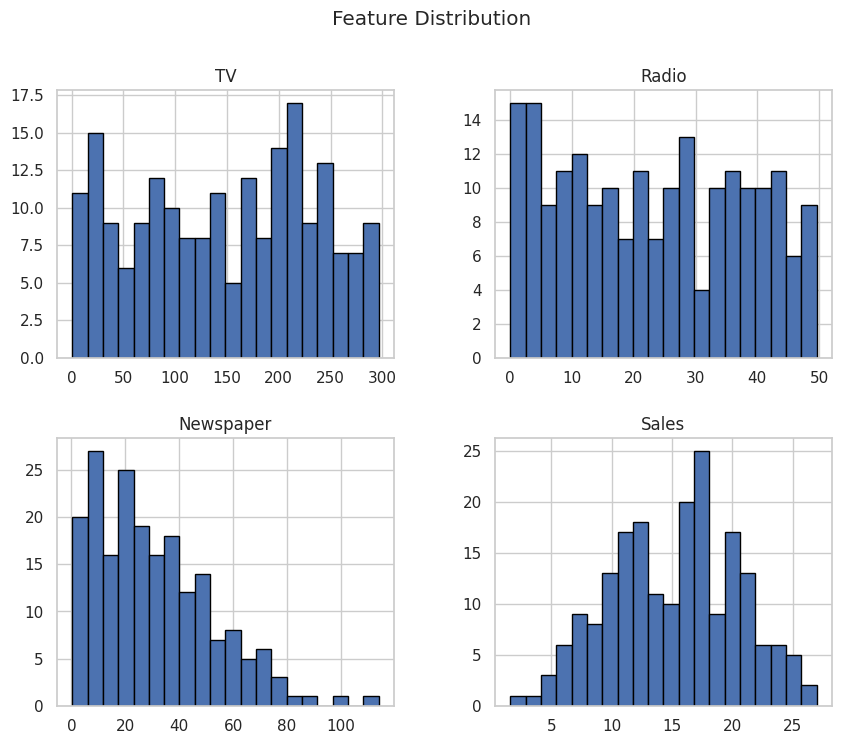

In [20]:
sns.set(style="whitegrid")

df.hist(bins = 20, figsize =(10,8), edgecolor=('black'))
plt.suptitle("Feature Distribution")
plt.show()


In [22]:
print("Missing values:\n", df.isnull().sum())

Missing values:
 TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


In [30]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# Assuming you have a DataFrame called 'df' with 'TV', 'Radio', 'Newspaper', and 'Sales' columns
# If not, please load your data into a pandas DataFrame first.

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[['TV', 'Radio', 'Newspaper']])
df_scaled = pd.DataFrame(scaled_features, columns=['TV','Radio','Newspaper'])
df_scaled['Sales']= df['Sales']

# Now, define your features (X) and target (y) using the DataFrame
X = df_scaled[['TV', 'Radio', 'Newspaper']]
y = df_scaled['Sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_predict = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)

print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

Mean Absolute Error: 1.2748262109549344
R-squared: 0.9059011844150825
